In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os




### image path

In [2]:
trainData = "../logo data/train"
validationData = "../logo data/validation"

In [3]:
BATCH_SIZE   = 3
EPOCHS       = 100
TARGET_SIZE  = 50
num_labels   = 3

In [4]:
train_datagen = ImageDataGenerator(validation_split       = 0.2,
                                   width_shift_range      = 0.2,height_shift_range=0.2,
                                   shear_range            = 0.2,
                                   zoom_range             = 0.3,
                                   horizontal_flip        = True)
validation_datagen = ImageDataGenerator(validation_split = 0.2)

In [5]:
training_data = train_datagen.flow_from_directory(trainData,
                                                  target_size  = (TARGET_SIZE, TARGET_SIZE),
                                                  batch_size  = BATCH_SIZE,
                                                  class_mode  = "categorical")
validation_data = train_datagen.flow_from_directory(validationData,
                                                  target_size  = (TARGET_SIZE, TARGET_SIZE),
                                                  batch_size  = BATCH_SIZE,
                                                  class_mode  = "categorical")

Found 122 images belonging to 3 classes.
Found 23 images belonging to 3 classes.


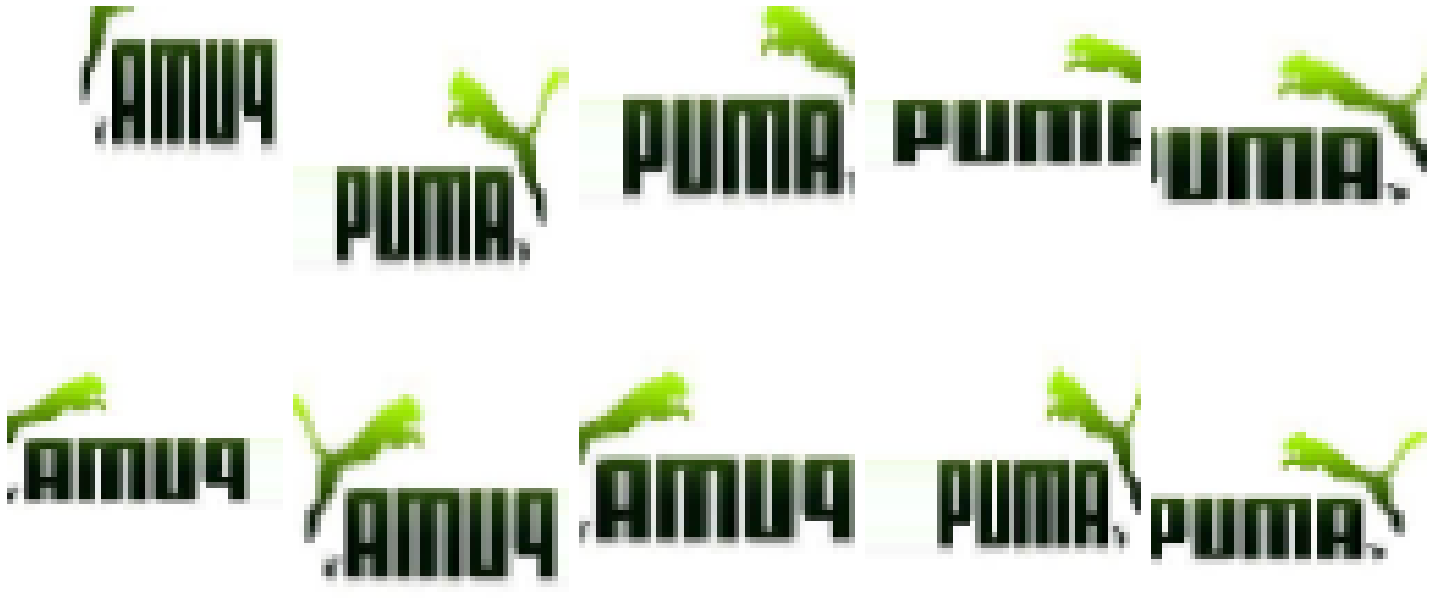

In [6]:
aug_images = [training_data[4][0][0]/255 for i in range(10)]
fig, axes  = plt.subplots(2, 5, figsize = (20, 10))
axes       = axes.flatten()

for img, ax in zip(aug_images, axes):
    ax.imshow(img)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [7]:
ACCURACY_THRESHOLD = 0.9

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()

In [8]:
# Loss curve
def lossCurve(history):
  plt.plot(history.history['loss'],'r',linewidth=3.0)
  plt.plot(history.history['val_loss'],'b',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)
# accuracy curve
def accuracyCurve(history):
  plt.plot(history.history['acc'],'r',linewidth=3.0) 
  plt.plot(history.history['val_acc'],'b',linewidth=3.0) 
  plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
  plt.xlabel('Epochs ',fontsize=16) 
  plt.ylabel('Accuracy',fontsize=16) 
  plt.title('Accuracy Curves',fontsize=16)
# Curve gride
def plotSummary(history):
    plt.figure(figsize=[18,10]) 
    plt.subplot(121)
    # Model summary of loss and accuray during training with data
    lossCurve(history)
    #Plot the Accuracy Curves
    plt.subplot(122)
    accuracyCurve(history)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu", input_shape=(TARGET_SIZE,TARGET_SIZE,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(3,activation="softmax")
    
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
history = model.fit( training_data,epochs=EPOCHS,verbose=1,validation_data = validation_data,callbacks=[callbacks])
plotSummary(history)

Epoch 1/100
